#Pytorch Computer Vision

##0. Making necessary imports

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


## 1. Getting a Dataset
The dataset we will be using is FashionMNIST from `torchvision.datasets`

In [ ]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform = torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
#first training example
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
#shape of out image
print(f"Image shape: {image.shape} ->[color channel, height, width]")

Image shape: torch.Size([1, 28, 28]) ->[color channel, height, width]


###1.2 Visualizing the data

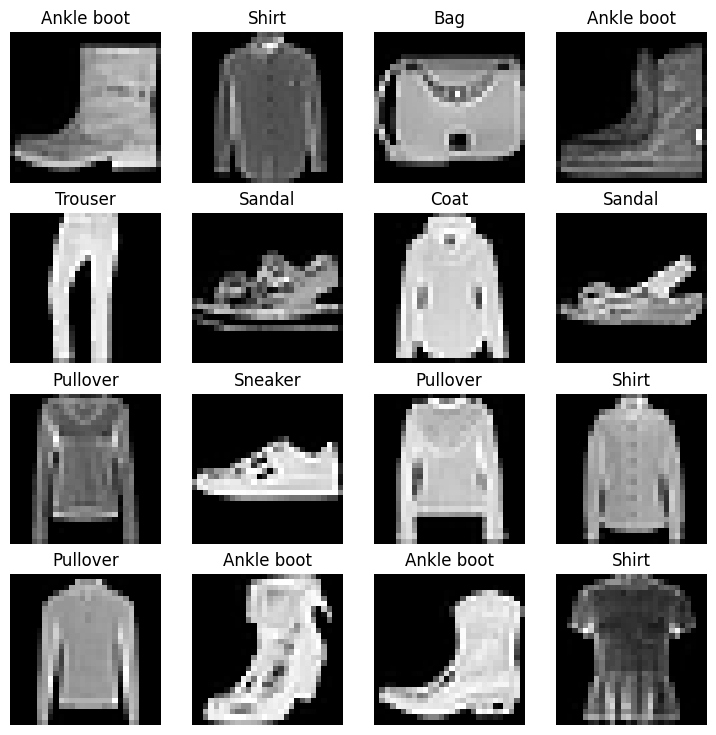

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0,len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_name[label])
  plt.axis(False)

In [ ]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

##2. Prepare DataLoader

Breakdown the data into batches of 32

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b8e10cb5fc0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b8e10cb60b0>)

In [ ]:
print(f"Length of the train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}.")
print(f"Length of the test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}.")

Length of the train dataloader: 1875 batches of 32.
Length of the test dataloader: 313 batches of 32.


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

##3. Setup device agnostic code(for using a GPU if available)

In [ ]:
!nvidia-smi

Sat May 18 22:51:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              33W /  70W |    161MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.is_available()

True

In [ ]:
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

##4. Model 2: Buliding a Convolutional neural Network(CNN)


In [ ]:
#Create a concolutional neural network
class FashionMNISTModelV2(nn.Module):

  def __init__(self,input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self,x):
    x=self.conv_block_1(x)
    x=self.conv_block_2(x)
    x=self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_name)).to(device)

In [ ]:
rand_image_tensor =torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

###4.1 Stepping through `nn.Conv2D()`

In [ ]:
torch.manual_seed(42)
images=torch.randn(size=(32,3,64,64))
test_image=images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [ ]:
#Create a single conv2d layer
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=(3,3),
                     stride=1,
                     padding=1)

#Pass the data through the convolutional layer
conv_output=conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[[ 1.6446e-01, -6.2518e-01, -7.7713e-01,  ..., -3.2504e-01,
           -3.1604e-01,  4.5352e-01],
          [ 3.5455e-01, -2.8778e-01, -6.0596e-02,  ...,  6.6224e-01,
           -2.3216e-01,  7.7080e-01],
          [-4.5420e-02, -9.8911e-01, -4.0099e-01,  ..., -1.8552e-01,
           -5.7622e-01,  4.2301e-01],
          ...,
          [ 2.9288e-01, -1.4512e-01, -1.1566e-01,  ..., -3.6626e-01,
            3.5645e-01,  2.8384e-01],
          [ 2.0746e-01,  3.6096e-02,  1.5214e-01,  ..., -4.9680e-01,
           -7.2258e-01, -8.3858e-02],
          [-3.2457e-01, -3.2326e-01,  9.5475e-02,  ...,  5.9960e-01,
            3.2819e-01,  3.6604e-01]],

         [[ 1.2406e+00,  2.2794e-01, -1.8362e-01,  ..., -6.3520e-01,
           -7.5413e-01,  4.0612e-01],
          [ 4.1380e-01, -1.0853e+00, -1.6079e+00,  ..., -1.7643e+00,
            2.5263e-01,  3.8844e-01],
          [ 5.3442e-01, -8.2507e-01,  6.3866e-01,  ...,  4.8068e-01,
            8.4869e-01, -1.5706e-01],
          ...,
     

###4.2 Stepping through `nn.MaxPool2d()`

In [ ]:
max_pool_layer=nn.MaxPool2d(kernel_size=2)

test_image_through_conv=conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer():{test_image_through_conv.shape}")

test_image_through_conv_and_max_pool=max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer() :{test_image_through_conv_and_max_pool.shape}")

Shape after going through conv_layer():torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer() :torch.Size([1, 10, 32, 32])


###4.3 Setup loss, optimizer and evaluation metrics



In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_function.py already exists...skipping download")

else:
  print("Downloading helper functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
#loss and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)

In [ ]:
#accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

###4.4 Timer function

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between atart and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

###4.5 Function training and evaluation/testing loops

Let's create a function for:
* training loop-`train_step()`
* testing loop-`test_step()`

In [ ]:
def train_step(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):

  train_loss,train_acc=0,0

  model.train()

  for batch, (X,y) in enumerate(data_loader):
    X,y = X.to(device), y.to(device)
    y_pred = model(X)

    loss = loss_fn(y_pred,y)
    train_loss +=loss
    train_acc+=accuracy_fn(y_true=y,
                           y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train Loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [ ]:
def test_step(model:torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):

  test_loss, test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X,y=X.to(device), y.to(device)

      test_pred = model(X)

      test_loss+=loss_fn(test_pred, y)

      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)

    test_acc/=len(data_loader)

    print(f"\nTest loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%\n")


###4.6 Training and testing the model using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from tqdm.auto import tqdm
from timeit import default_timer as timer
train_time_start_model_2=timer()

epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model_2,
                                          end=train_time_end_model_2,
                                          device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train Loss: 0.59435 | Train acc: 78.48%

Test loss: 0.39480 | Test Acc: 85.76%

Epoch: 1
-----
Train Loss: 0.36061 | Train acc: 87.01%

Test loss: 0.35235 | Test Acc: 86.78%

Epoch: 2
-----
Train Loss: 0.32177 | Train acc: 88.34%

Test loss: 0.32785 | Test Acc: 87.95%

Train time on cuda: 36.907 seconds


In [ ]:
#Get model results
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: device):

  """Returns a dictionary containing the results of model predicting on dat_loader"""

  loss, acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y=X.to(device), y.to(device)
      y_pred = model(X)
      loss +=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,
                       y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /=len(data_loader)

  return {"model_loss":loss.item(),
          "model_acc": acc}


model_2_results=eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_loss': 0.3278454840183258, 'model_acc': 87.94928115015975}

##5. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample, dim=0).to(device)
      pred_logit=model(sample)
      pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

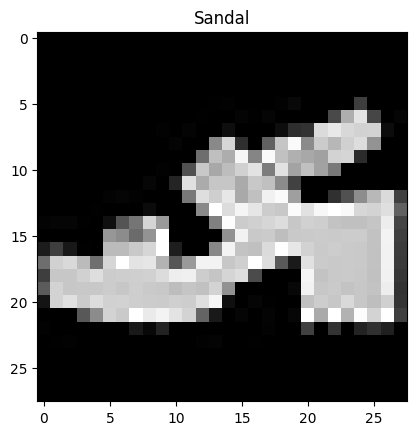

In [ ]:
plt.imshow(test_samples[0].squeeze(0),cmap="gray")
plt.title(class_name[test_labels[0]])

In [ ]:
#Make predictions
pred_probs=make_predictions(model=model_2,
                            data=test_samples)
pred_probs[:2]

tensor([[8.2166e-07, 2.7909e-07, 5.9787e-07, 3.2137e-07, 2.2104e-08, 9.9949e-01,
         1.3616e-06, 1.0557e-04, 7.5327e-05, 3.2873e-04],
        [4.8898e-02, 5.1893e-01, 1.9276e-03, 8.0086e-02, 1.8028e-01, 3.0555e-04,
         1.6905e-01, 2.4190e-04, 1.2994e-04, 1.4017e-04]])

In [ ]:
#Convert predictions probabilities to labels
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

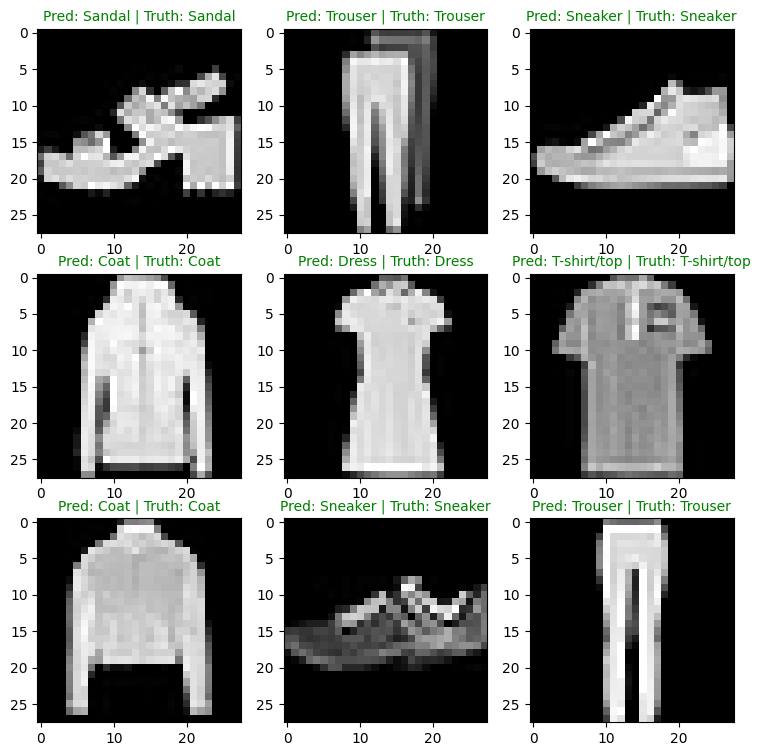

In [ ]:
#Plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  pred_label=class_name[test_labels[i]]
  truth_label=class_name[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")

##6. Making a confusion matrix for evaluation of the model


In [ ]:
from tqdm.auto import tqdm
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making Predictions..."):
    X,y=X.to(device),y.to(device)
    y_logit=model_2(X)
    y_pred=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

y_pred_tensor=torch.cat(y_preds)
y_pred_tensor[:10]

Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtnd version:{mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.1 MB/s eta 0:00:00
mlxtnd version:0.23.1


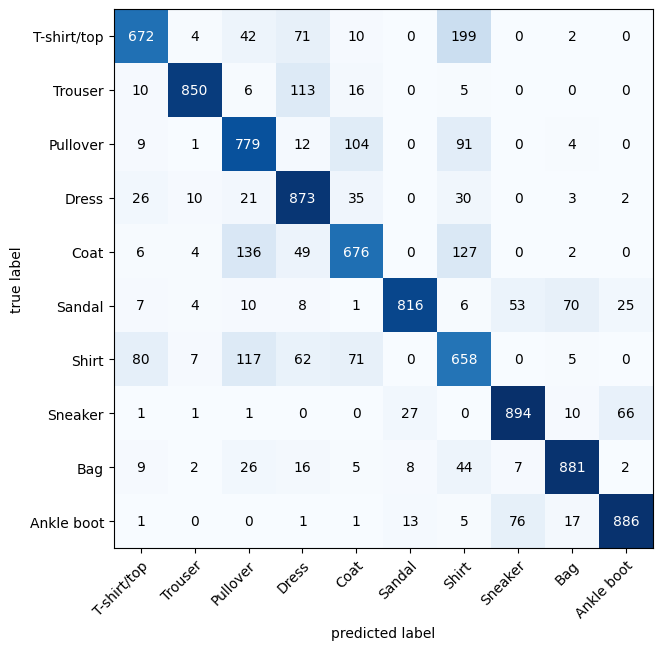

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat=ConfusionMatrix(num_classes=len(class_name),task="multiclass")
confmat_tensor=confmat(preds=y_pred_tensor,
                       target=test_data.targets)

fig, ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_name,
    figsize=(10,7)
)

##7. Saving and loading our trained model

In [ ]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME="03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to:models/03_pytorch_computer_vision_model_2.pth


In [ ]:
#Create a new instance of model 2
torch.manual_seed(42)
loaded_model_2=FashionMNISTModelV2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(class_name))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#Evaluate loaded model
torch.manual_seed(42)
loaded_model_2_results=eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_loss': 0.3278454840183258, 'model_acc': 87.94928115015975}